<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-Week-4/blob/main/ML_Zoomcamp_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 27/09/2022**

In [37]:
# Import libraries for the project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import the library warnings to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Lets train the model again first - to use its results later in this notebook

# Import packages from Sklearn for the project
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [39]:
# Data import and preparation

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [40]:
# Setting up the validation framework

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [41]:
# Define the list of categorical and numerical variables

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [42]:
# Turn the data into a dictionary and we want each row to turn into a dictionary 
train_dict = df_train[categorical + numerical].to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv.fit(train_dict)

# Use the function transform with our DictVectorizer
X_train = dv.transform(train_dict)

In [43]:
# Create a model logistic regression
model = LogisticRegression(solver='liblinear', random_state=1)

# For training the model we use the fit method
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [44]:
# Create validation dictionary with categorical and numerical variables
val_dict = df_val[categorical + numerical].to_dict(orient='records')

# Use the function transform with our validation dictionary
X_val = dv.transform(val_dict)

# Apply our model on X validation and use the first column
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
# Create a small subset from the dataframe
small_subset = ['contract', 'tenure', 'totalcharges']

# Turn the data into a dictionary and we want each row to turn into a dictionary 
train_dict_small = df_train[small_subset].to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv_small = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv_small.fit(train_dict_small)

# Use the function transform with our DictVectorizer
X_small_train = dv_small.transform(train_dict_small)

# Create a model logistic regression
model_small = LogisticRegression(solver='liblinear', random_state=1)

# Use the method fit and first we train our DictVectorizer
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [46]:
# Turn the data into a dictionary and we want each row to turn into a dictionary 
val_dict_small = df_val[small_subset].to_dict(orient='records')

# Use the function transform with our DictVectorizer
X_small_val = dv_small.transform(val_dict_small)

# Apply our model on Y predition and use the first column
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [47]:
# Accuracy:

# Apply our model on Y predition and use the first column
y_pred = model.predict_proba(X_val)[:, 1]

# Store the Y prediction has 50% or more
churn = y_pred >= 0.5

# Calculate the percentange of the churn using the mean function
(churn == y_val).mean()

0.8016129032258065

In [48]:
# Accuracy and dummy model:

# . Evaluate the model on different thresholds
# . Check the accuracy of dummy baselines

# Check how many customers we have with Y validation dataset
len(y_val)

1860

In [49]:
# we have 1.860 customers and for all this customers we will make a prediction
# each customer we assign a score and then we make a decision
# some of this decisions are correct and some of this decisions are incorrect

# Check how many decisions are correct
(y_val == churn).sum()

1491

In [50]:
# so have 1.491 customers with the correct decision

# some of our decisions are not correct and we calculate doing:
# total of correct decisions or predictions divide by the total of customers
# in our case is 80%

In [51]:
print(str(round((1491 / 1860) * 100)) + '%')

80%


In [52]:
# Use the function linspace to generate numbers from 0 to 1 with size of the array 21 elements
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [53]:
# Create a list to store all the accuracies
scores = []

# For eah of the values above we can treat as a threshold
for t in thresholds:

  # Store the Y prediction we use t threshold list intead of has 50% or more
  # churn = y_pred >= 0.5 <-- THIS LINE OF CODE IT WAS BEFORE
  # NEW LINE OF CODE:
  churn_decision = (y_pred >= t)

  # Check how many decisions are correct
  score = (y_val == churn_decision).mean()

  # Print the score with some formatation
  print('%.2f %.3f' % (t,score))

  # Append the list scores with accuracy
  scores.append(score)

  # below the 0.50 its the best threshold for this specif problem

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


In [54]:
# Print the list scores with accuracies
scores

[0.26129032258064516,
 0.5010752688172043,
 0.5946236559139785,
 0.6403225806451613,
 0.6897849462365592,
 0.7295698924731183,
 0.7548387096774194,
 0.7672043010752688,
 0.7817204301075269,
 0.7951612903225806,
 0.8016129032258065,
 0.7903225806451613,
 0.7897849462365591,
 0.7881720430107527,
 0.7736559139784946,
 0.7521505376344086,
 0.7419354838709677,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549,
 0.7387096774193549]

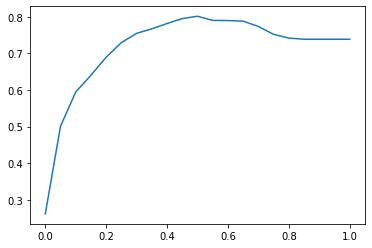

In [55]:
# Plot the list scores with accuracies
plt.plot(thresholds, scores) 
# x-axis is the thresholds
# y-axis is the scores

In [56]:
# doing the same above but now with sklearn:

# Import the package accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [57]:
# Use the function accuracy score from sklearn
accuracy_score(y_val, churn_decision)

0.7387096774193549

In [58]:
# Use the function accuracy score from sklearn with the threshold list

# Use the function linspace to generate numbers from 0 to 1 with size of the array 21 elements
thresholds = np.linspace(0, 1, 21)

# Create a list to store all the accuracies
scores = []

# For eah of the values above we can treat as a threshold
for t in thresholds:

  # Store the result of the functin accuracy score
  score = accuracy_score(y_val, y_pred >= t)

  # Print the score with some formatation
  print('%.2f %.3f' % (t,score))

  # Append the list scores with accuracy
  scores.append(score)

# we can see below the values are exactly the same

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


In [59]:
# from the plot above we can see for the threshold above of 1.0
# we don't have more values the last score is 0.739 or 73.9% this accuracy its pretty decent
# remember our model was 80% accurate  
# but now with our dummy model is 73.9% where predicts how many customers are not churning

# Use a special package collections from Python to count things
from collections import Counter

# Use the function counter from collections to count how many are true or false
# the line below it predicts how many customers are not churning
Counter(y_pred >= 1.0)

# below we can see the counter only count false values

Counter({False: 1860})

In [60]:
# Confusion table:

# . Different types of errors and correct decisions
# . Arranging them in a table

# Create an array for customers are really churn and this is for case validations are 1
actual_positive = (y_val == 1)

# Create an array for customers are not going to churn and this is for case validations are 0
actual_negative = (y_val == 0)

# the arrays above they will store true's and falses values
actual_positive

array([False,  True, False, ..., False, False, False])

In [61]:
# Define the threshold for positive and negative scores
t = 0.5

# Store the positive predictions
predict_positive = (y_pred >= t)

# Store the negative predictions
predict_negative = (y_pred < t)

# Combine in one the predictions and actual positives values
predict_positive & actual_positive
# note: the way it combines the trues and falses is:
# true and true is equal to true
# false and true is equal to false
# false and false is equal to false

# note: the & operator it computes the element wise logical end

array([False, False, False, ..., False, False, False])

In [62]:
# Check how many predictions and actual positives are
(predict_positive & actual_positive).sum()

289

In [63]:
# Store the true positive values in a variable
tp = (predict_positive & actual_positive).sum()
tp

289

In [64]:
# Store the true negatives values in a variable
tn = (predict_negative & actual_negative).sum()
tn

1202

In [65]:
# Store the false positive values in a variable
fp = (predict_positive & actual_negative).sum()
fp

172

In [66]:
# Store the false negatives values in a variable
fn = (predict_negative & actual_positive).sum()
fn

197

In [67]:
# Create array with the confusion matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [68]:
# Print the array with the confusion matrix
confusion_matrix

# below we can see the have more false negatives then false positives
# false positives are the customers get a promotional email
# even though they are not going to churn, so we actually lose some money
# by giving them the discount so they are not going to churn but we given them discount

# the false negative we don't send to the customers the email because they will leave
# where are losing profit because we do not mange to retain these customers and they leave

# we have different types of errors and the false negatives are more difficult to catch so
# we have a lot more false negatives than false positives so have this situation now we know
# what kind of errors the model makes

array([[1202,  172],
       [ 197,  289]])

In [69]:
# to normalize the confusion matrix above instead of having absolute numbers we can have relative 
# numbers, so we can have percents

# Normalize the confusion matrix with percents
(confusion_matrix / confusion_matrix.sum()).round(2)

# 65% and 16% are correct predictions
# 9% and 11% are incorrect predictions

# we can conclude with our accuracy = 80% is 65% + 15% (not 16% because of the rouding)
# this is how we get our accuracy of 80%

array([[0.65, 0.09],
       [0.11, 0.16]])

In [71]:
# Precision and Recall:

# Precision and recall are metrics for evaluating binary classification models

# We can express accurcy as sum of true positive TP plus true negative TN
# and we divide that by the total number of all the observations which is:
# TP + TN + FP + FN

# Express accuracy of our model
(tp + tn) / (tp + tn + fp + fn)

0.8016129032258065

In [72]:
# Precision:

# Precision tell us how many positive predictions turned out to be correct
# or more like not how many but fraction of correct positive predictions 
# so it means that we predict some customers as churning and then out of those
# how many are identified correctly

# Precision tell us among those customers that we predicted as churning what is
# the fraction of correct predictions 

# Calculate the precision of our model
p = tp / (tp + fp)
p

0.6268980477223427